# Homework 8: Magnetization, Energy in the Ising Model

Physics 177, Spring 2017 (Prof. Tanedo)  
Due: Friday, June 16    

*Jesus Negrete*

# Problem 0

Please be sure to fill out:
1. The course survey (e-mailed directly to you; e-mail Prof. Tanedo if you have not received this!)
2. iEval course evaluation (http://ieval.ucr.edu)
3. Sign up for a "final interview": https://doodle.com/poll/xyb7dgcupq9gwaqm

# Problem 1

Code the Ising model to study the phase transition at $T_c\approx 2.27$ (in units where $J = k_B = 1$). Use the Metropolis algorithm for Markov Chain Monte Carlo, as we set up in Lecture 18: https://github.com/Physics177-2017/Lec18-Ising-Model/blob/master/Lec18-IsingModel.ipynb

**Make the following plots:**
1. Magnetization as a function of temperature
2. Energy as a function of temperature

You may define magnetization as the total spin of the system (sum of the spins of each node). You may define the energy as the sum of $\Delta E_i$ for each spin $i$. Recall that 

$$\Delta E_i = -\sum_{j} s_is_j$$

(Note: actually, you should define $E = \sum_i \Delta E_i/4$, but we don't care about the overall pre-factors, we just want to see the qualitative shapes of the plots.)

**Guidelines**
You should be able to get reasonable results for:
* A $20\times 20$ array.
* Sampling 1000 temperature points between $T=1$ and $T=4$
* Allowing 2000 Monte Carlo steps to draw a sample.

*Pro-tip:* One way to improve your calculations is to let your Monte Carlo "equilibrate" before recording data. In other words, your Markov Chain algorithm should be:

1. Pick a random configuration
2. Run for 2000 steps (without recording data)
3. Perform your Markov Chain algorithm as usual, using the configuration at the end of step 2 as your initial configuration.


Code this up on your own, you may use the code from Lecture 18 as a starting point. 

The *answers* are available in a notebook written by Rajesh Singh:
http://rajeshrinet.github.io/blog/2014/ising-model/
... you may use that notebook (in particular, the plots) as a guideline for what your code should produce. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import *

In [2]:
N = 20
grid = np.zeros((N, N))
#currSpin = []
#magnet = 0

for i in range(N):
    for j in range(N):
        # assign a random +1 or -1 sping
        grid[i][j] = 2*randint(0,1) - 1 
#        currSpin.append(grid[i][j])
        
#for i in range (N):
#    magnet += currSpin[i]
        
#print(grid)
#print(currSpin)

#print(magnet)

In [3]:
def new_spin(some_grid, beta, i, j):
    """
    Takes the grid and the temperature,
    runs Metropolis algorithm to give the
    updated value of the (i,j) element.
    """
    spin = some_grid[i,j]
    spin_flip = -spin

##  TESTING
    #print(i)
    #print(j)
    #print("spin is:") 
    #print(some_grid[i,j])
    
#   Periodic boundary conditions
    net_neighbor_spin = \
        some_grid[(i+1)%N,j] + \
        some_grid[(i-1)%N,j] + \
        some_grid[i,(j+1)%N] + \
        some_grid[i,(j-1)%N]
        
    deltaE = -spin_flip*net_neighbor_spin/4 - \
             (-spin*net_neighbor_spin/4)
##  TESTING
    #print("deltaE is")
    #print(deltaE)
        
    if deltaE < 0:
#        print("lower E, flipped")
        return -spin
    
    else:
        if random() < np.exp(beta*deltaE):
#            print("lucky roll, flipped")
            return -spin
        else:
#            print("no flip")
            return spin
#print(grid)
#print(new_spin(grid,1,2,2))

In [5]:
def grid_update(some_grid, beta):
    i = randint(0,N-1)
    j = randint(0,N-1)
#     new_grid = some_grid
#     new_grid[i,j] = new_spin(some_grid, beta, i, j)
#     return new_grid
    some_grid[i,j] = new_spin(some_grid, beta, i, j) 
    
#print(grid)
#grid_update(grid,1)
#print(grid)

In [11]:
dt = .004
Temperature = np.arange(1,4,dt)

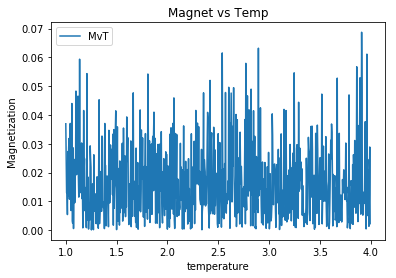

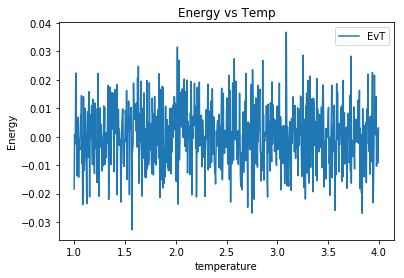

In [16]:
record = []
magnetization = []
Energy =[]
N_trials = 1000
temp = 1
invTemp = 1/temp

for a in Temperature:
    Minit = 0
    Einit = 0
    record.append(np.array(grid))
    
    for b in range(2*N_trials):
        grid_update(grid,invTemp) 
        
    
    for c in range (2*N_trials):
        grid_update(grid,invTemp) 
        magnet = 0
        currSpin = []
    #Start by getting the Magnetixation portion
        for i in range(N):
            for j in range(N):
            # assign a random +1 or -1 sping
                currSpin.append(grid[i][j])
            
        for i in range(N*N):
            magnet += currSpin[i]
        
        Minit += magnet
        #print(currSpin)    
        #print(magnet)
        
    #Collecting Energy Information
        energy = 0
        for i in range (N):
            for j in range (N):
                spin = grid[i,j]
                surrSpin = grid[(i+1)%N,j] + grid[(i-1)%N,j] + grid[i,(j+1)%N] + grid[i,(j-1)%N]
                energy += -surrSpin*spin
        Einit += energy/4
    
    magnetization.append(Minit/(2*N_trials*N*N))
    Energy.append(Einit/(2*N_trials*N*N))
    
    
    temp += dt
    invTemp = 1/temp

Es = np.array(Energy)
Ms = np.array(magnetization)
ts = np.array(Temperature)
#print(magnetization)
#charge = magnetization/N_trials
#print(charge)

#for a in range(N_trials):
#    plt.imshow(record[a])
#    plt.show()
plt.plot(ts, abs(Ms), label='MvT')
plt.title("Magnet vs Temp")
plt.xlabel('temperature')
plt.ylabel('Magnetization')
plt.legend()
plt.show()

plt.plot(ts, Es, label='EvT')
plt.title("Energy vs Temp")
plt.xlabel('temperature')
plt.ylabel('Energy')
plt.legend()
plt.show()